#Books -

Aurélien Géron - Hands-On Machine Learning with Scikit-Learn and TensorFlow

Trent Hauck - scikit-learn Cookbook (2014, PacktPub)

In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib inline
plt.rcParams['figure.figsize'] = (9.0, 7.0)

In [128]:
dataset = pd.read_csv('WineQuality.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [129]:
dataset.shape

(1599, 12)

In [130]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     3
total sulfur dioxide    0
density                 0
pH                      0
sulphates               1
alcohol                 0
quality                 0
dtype: int64

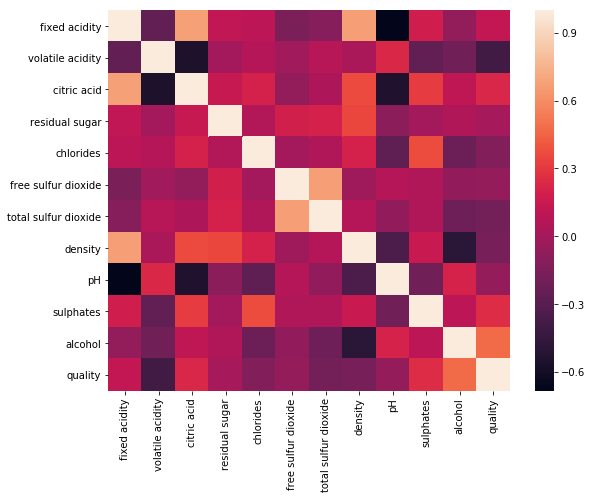

In [131]:
corr = dataset.corr()

sns.heatmap(corr)

In [132]:
corr['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251519
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.054391
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

## Outliers Detection

#Plot a boxplot to check for Outliers
#Target variable is Quality. So will plot a boxplot each column against target variable

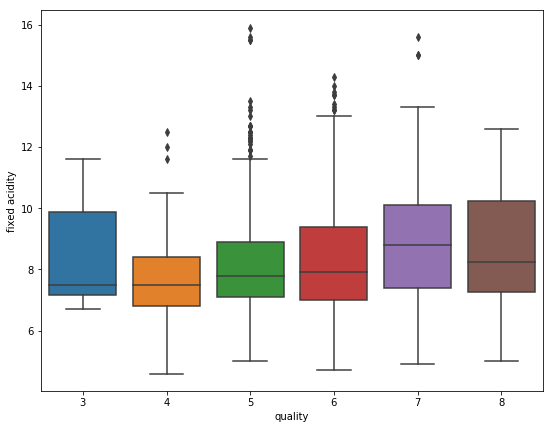

In [133]:
# 1. fixed acidity

sns.boxplot('quality', 'fixed acidity', data = dataset)

#### We will now create a generic method to remove all outliers


In [135]:
def remove_outliers(df, feature_name):
    lower_bound = .25
    upper_bound = .75
    
    Q3 = dataset.quantile(upper_bound)[feature_name]
    Q1 = dataset.quantile(lower_bound)[feature_name]
    
    IQR = Q3 - Q1
    print('IQR = {}'.format(IQR))
    
    upper_limit = Q3 + (1.5*IQR)
    lower_limit = Q1 - (1.5*IQR)
    
    print('Upper Limit = {}'.format(upper_limit))
    print('Lowe Limit = {}'.format(lower_limit))
    
    df_cleaned = df[(df[feature_name] < upper_limit) & (dataset[feature_name] > lower_limit)]
    
    print('Removed {} outliers from dataset'.format(df.shape[0] - df_cleaned.shape[0]))
    
    return df_cleaned
   
    

In [136]:
dataset = remove_outliers(dataset, 'fixed acidity')

IQR = 2.0999999999999996
Upper Limit = 12.349999999999998
Lowe Limit = 3.95
Removed 49 outliers from dataset


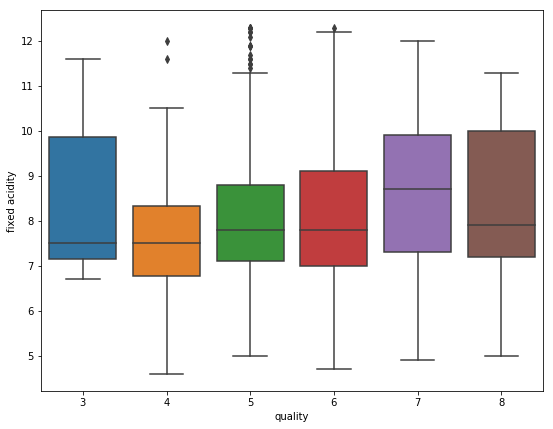

In [137]:
#Verifying boxplot after outlier removal
sns.boxplot('quality', 'fixed acidity', data = dataset)

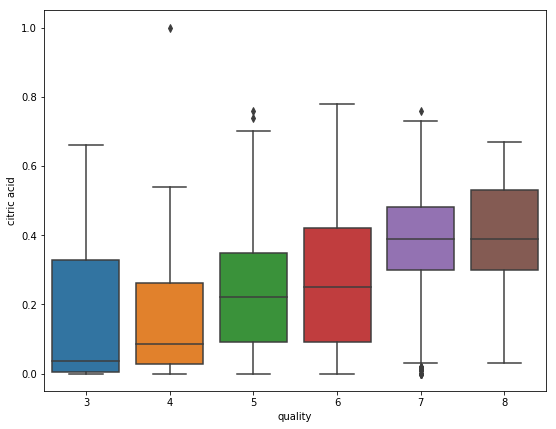

In [138]:
# 2. citric acid
sns.boxplot('quality', 'citric acid', data = dataset)

IQR = 0.31999999999999995
Upper Limit = 0.8899999999999999
Lowe Limit = -0.3899999999999999
Removed 1 outliers from dataset


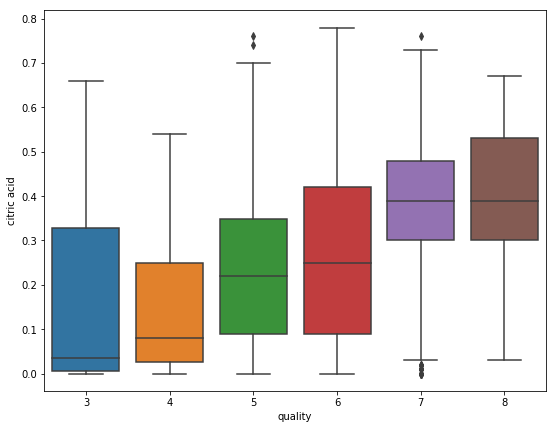

In [140]:
#Removing Outliers
dataset = remove_outliers(dataset, 'citric acid')
sns.boxplot('quality', 'citric acid', data = dataset)

#### If there are too many features with outliers, it is always better to iterate the process using a list containing all feature names.

In [111]:
for feature in col_list:
    print(feature)
    X = remove_outliers(dataset, feature)

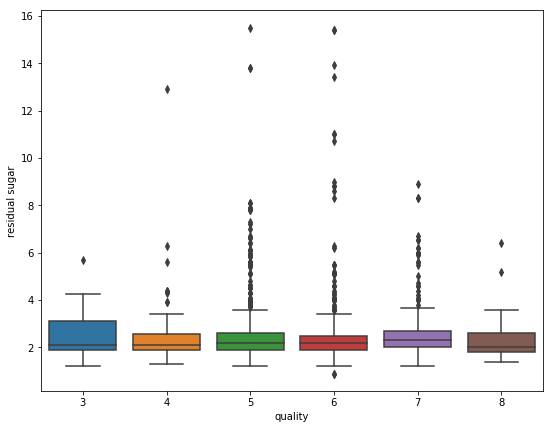

In [141]:
# 3. residual sugar
sns.boxplot('quality', 'residual sugar', data = dataset)

Above boxplot shows too many outliers, hence we should not remove these as it may lead to deletion of crucial information.

## Binning Class Variable

In [160]:
dataset['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [169]:
dataset['quality'].value_counts()

5    666
6    616
7    189
4     51
8     17
3     10
Name: quality, dtype: int64

Discretization into 3 bins for the class (quality) - low, med, high, binning any higher decreased accuracy.

In [175]:
mybins = (1, 4, 7, 8)
label_names = ['bad', 'average', 'good']
dataset['quality_binned'] = pd.cut(dataset['quality'], bins=mybins, labels=label_names)

dataset['quality_binned'].value_counts()

average    1471
bad          61
good         17
Name: quality_binned, dtype: int64

## Splitting dataset into X and y

In [142]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1:]

## Handling missing values

In [144]:
X.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     3
total sulfur dioxide    0
density                 0
pH                      0
sulphates               1
alcohol                 0
dtype: int64

In [145]:
X.fillna(X.mean(), inplace=True)

In [146]:
X.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [147]:
col_list = list(X.columns)

print(col_list)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


## Splitting into training and test set

Let's check our dataset before splitting

In [151]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [152]:
y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [153]:
#Splitting into training and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

## Data Tranformation using Pipeline

The Pipeline constructor takes a list of name/estimator pairs defining a sequence of steps. The
last estimator must be transformers (i.e., they must have a fit_transform() method). The names can be
anything you like.


Now let's remove some features using pipeline.

Since Scikit-Learn does not provide any tranformer for Pandas DataFrames, we need to create a simple custom transformer.

In [154]:
#Custom Tranformer
from sklearn.base import BaseEstimator, TransformerMixin

class MyDataframeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, del_features):
        self.features_to_remove = del_features
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(self.features_to_remove, axis=1).copy()
        

In [155]:
#Tranforming using Pipelines

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipeline = Pipeline([
    ('selector', MyDataframeSelector(['chlorides', 'residual sugar'])),
    ('imputer', SimpleImputer(strategy='median')),
    ('scalar', StandardScaler()),
    ('pca', PCA(n_components=9))
])

In [156]:
X_train_trans = pipeline.fit_transform(X_train)
X_test_trans = pipeline.transform(X_test)

In [157]:
#Pipleine's fit_tranform returns a numpy array, hence we need to reconvert it back to Dataframe

X_train_final = pd.DataFrame(X_train_trans)
X_test_final = pd.DataFrame(X_test_trans)

In [158]:
X_train_final.head()

,0,1,2,3,4,5,6,7,8
0,-0.952171,0.851924,0.144309,0.378459,0.783634,-1.635571,0.855418,-0.495586,-0.248049
1,-0.013270,-0.916974,-0.721177,-1.263560,-0.502726,-0.575511,0.269153,0.053843,-0.586283
2,-2.508253,-0.335435,0.716270,1.556664,1.268671,-1.896636,0.033633,0.948769,-0.167013
3,0.091831,-0.872386,-0.960239,-0.530863,-0.304974,-0.636924,0.189007,0.152321,-0.852364
4,0.980891,-0.085768,-1.382633,0.019792,0.233958,-0.794115,-0.141803,0.041533,0.006133


In [159]:
#RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

scores =[]
estimators = np.arange(10, 100, 10)

for n in estimators:
    classifier = RandomForestClassifier(n_estimators=n)
    classifier.fit(X_train_final, y_train.values.reshape(-1,))
    y_pred = classifier.predict(X_test_final)
    scores.append(accuracy_score(y_test, y_pred))

print(scores)
print('The best accuracy ({}) is obtained when n_estimators = {}'.format(max(scores), estimators[scores.index(max(scores))]))

[0.6709677419354839, 0.6473118279569893, 0.6795698924731183, 0.6688172043010753, 0.6688172043010753, 0.6838709677419355, 0.6817204301075269, 0.6688172043010753, 0.6817204301075269]
The best accuracy (0.6838709677419355) is obtained when n_estimators = 60
